<a href="https://colab.research.google.com/github/AlessaDenufa/MiniProject_Dibimbing_SalmaDNF/blob/main/Dibimbing_Data_Science_Salmadnf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Perbandingan Algoritma Random Forest dengan XGBoost pada kasus Diabetes**
## **Nama: Salma Dewi Nur Faridah**


## **1. Pengumpulan Data**

In [ ]:
# Import necessary libraries
from IPython import get_ipython
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Import accuracy_score, precision_score, recall_score, and f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
# Load dataset
diabetes = load_diabetes()

# Konversi ke DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Tampilkan 5 baris pertama
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# **2. Data Preprocessing**

## **Data Cleaning**

In [ ]:
df = df.dropna()

## **Mendeteksi Outliner**

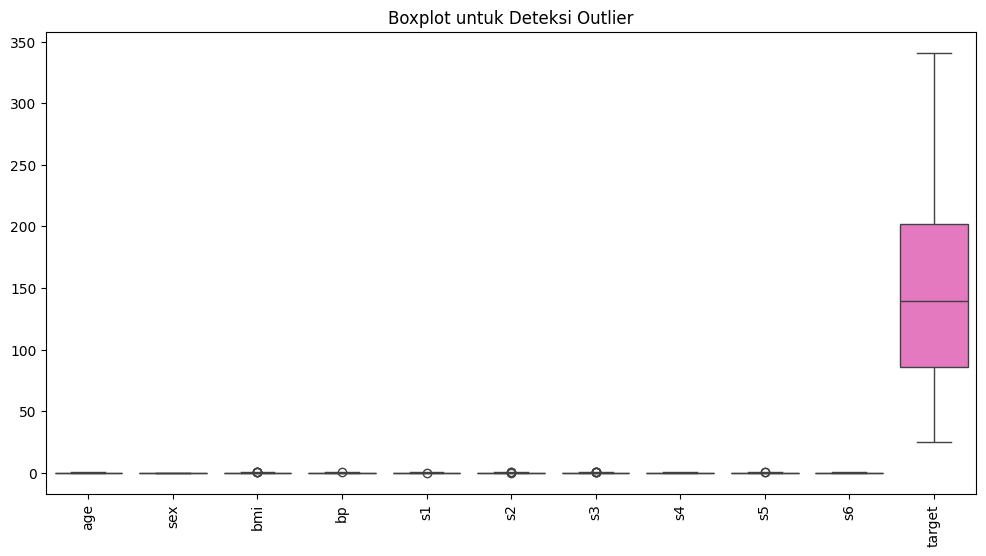

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

## **Cek outliners dengan IQR**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

## **Normalisasi Fitur**

In [ ]:
scaler = StandardScaler()
X = df.drop(columns=['target'])
y = df['target']
X_scaled = scaler.fit_transform(X)

# **3. EDA (Exploratory Data Analysis)**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 440
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     411 non-null    float64
 1   sex     411 non-null    float64
 2   bmi     411 non-null    float64
 3   bp      411 non-null    float64
 4   s1      411 non-null    float64
 5   s2      411 non-null    float64
 6   s3      411 non-null    float64
 7   s4      411 non-null    float64
 8   s5      411 non-null    float64
 9   s6      411 non-null    float64
 10  target  411 non-null    float64
dtypes: float64(11)
memory usage: 38.5 KB
None


In [ ]:
print(df.describe())

              age         sex         bmi          bp          s1          s2  \
count  411.000000  411.000000  411.000000  411.000000  411.000000  411.000000   
mean    -0.000035    0.000352   -0.001478   -0.000254   -0.004133   -0.002347   
std      0.048200    0.047644    0.045594    0.046634    0.043897    0.044178   
min     -0.107226   -0.044642   -0.090275   -0.112399   -0.126781   -0.115613   
25%     -0.034575   -0.044642   -0.034229   -0.033213   -0.035968   -0.030437   
50%      0.005383   -0.044642   -0.007284   -0.005670   -0.005697   -0.003819   
75%      0.038076    0.050680    0.028284    0.032769    0.023198    0.026087   
max      0.110727    0.050680    0.128521    0.132044    0.109883    0.117056   

               s3          s4          s5          s6      target  
count  411.000000  411.000000  411.000000  411.000000  411.000000  
mean    -0.001573   -0.002205   -0.002924   -0.001823  149.970803  
std      0.043387    0.044260    0.045482    0.044274   75.772954 

## **Cek Korelasi antar fitur**

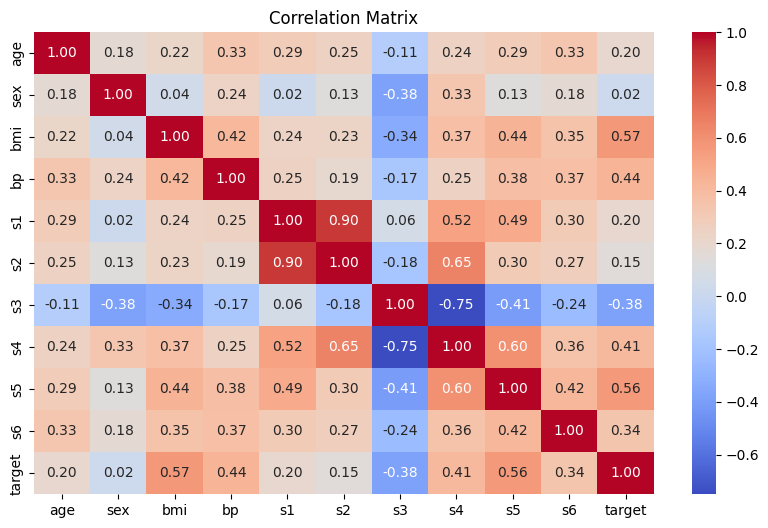

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# **4. Spliting Data**

In [ ]:
#Spliting Data 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, train_size=0.8, random_state=42)


# **5. Modeling (Regresi)**

## **Random Forest**

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

## **XGBoost**

In [ ]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# **6. Evaluasi**

### **Random Forest**

In [ ]:
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")

Random Forest - MSE: 3371.57, R²: 0.49


### **XGBoost**

In [ ]:
print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}")

XGBoost - MSE: 4097.05, R²: 0.38


## **Visualisasi hasil prediksi**

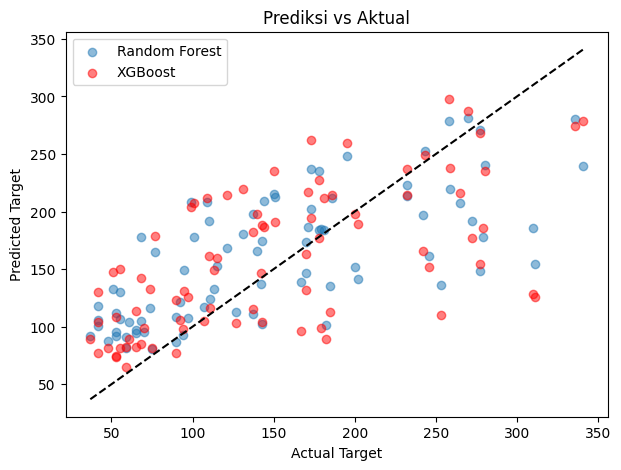

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost', color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.legend()
plt.title("Prediksi vs Aktual")
plt.show()

## **Confusion Matrix**

In [ ]:
y_true = df['target'] > df['target'].median()  # Menggunakan median sebagai batasan klasifikasi
y_pred = np.random.choice([True, False], size=len(df))

In [ ]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Akurasi: 0.5182
Presisi: 0.5182
Recall: 0.5182
F1-Score: 0.5179


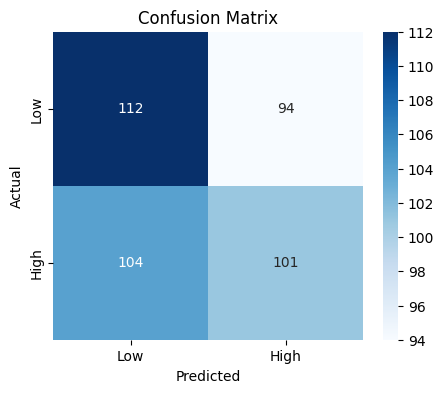

In [ ]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **Visualisai perbandingan MSE antar model**

<ipython-input-55-fdc3cd72054f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='viridis')


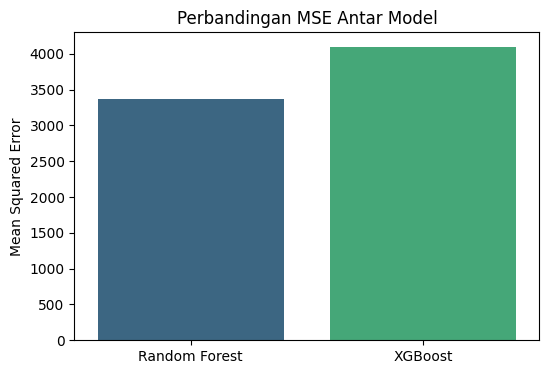

In [ ]:
models = ['Random Forest', 'XGBoost']
mse_values = [rf_mse, xgb_mse]
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title("Perbandingan MSE Antar Model")
plt.ylabel("Mean Squared Error")
plt.show()

## **Visualisasi perbandingan R^2 antar model**

<ipython-input-56-d05b8b635072>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette='magma')


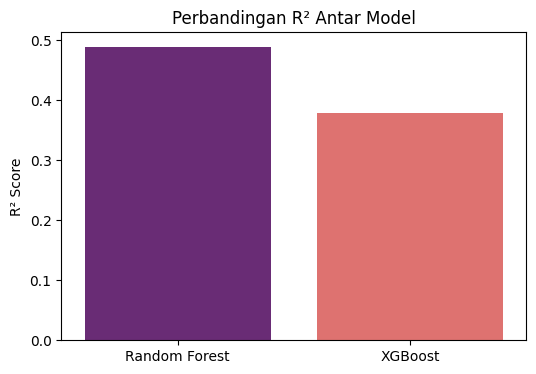

In [ ]:
r2_values = [rf_r2, xgb_r2]
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=r2_values, palette='magma')
plt.title("Perbandingan R² Antar Model")
plt.ylabel("R² Score")
plt.show()